# Data Structures and Processing

## Week3: NumPy, and Matplotlib

### Task 1: Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [1]:
def heaviside(num):
    if num > 0:
        return 1
    else:
        return 0


In [2]:
### BEGIN HIDDEN TESTS

assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1
### END HIDDEN TESTS

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

Extend the `heaviside` function to handle the `ndarray`.

In [3]:
import numpy as np

def heaviside(num):
    if isinstance(num, np.ndarray):  # Correctly checks if input is a NumPy array
        return np.where(num > 0, 1, 0)  # Correctly applies condition element-wise
    else:  # Correctly handles single numbers (int or float)
        return 1 if num > 0 else 0


In [4]:
### BEGIN HIDDEN TESTS
import numpy as np
assert np.array_equal(heaviside(np.array([-1.2, 0.2, 3])), np.array([0, 1, 1]))
### END HIDDEN TESTS

### Task 2: Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [5]:
import numpy as np


def mean_squared_values(arr):
    return np.mean(arr**2)
# very self explanatory way nut I believe it should be acceptable.


In [6]:
### BEGIN HIDDEN TESTS
import numpy as np
x_utest = np.random.normal(size=(2,3))
assert mean_squared_values(x_utest) == np.mean(x_utest**2)
### END HIDDEN TESTS

### Task 3: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1: Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array.

In [7]:
import numpy as np

def read_values(filename, index=0):
    return np.loadtxt(filename, delimiter=",", usecols=index)

In [8]:
### BEGIN HIDDEN TESTS
import numpy as np
assert np.array_equal(read_values("data.txt"), np.loadtxt("data.txt", delimiter=",", usecols=0))
### END HIDDEN TESTS

Use your function to read in values to two variables `x_values` and `y_values`.

In [9]:
# Replace `None` below with appropriate functional calls to `read_values
x_values = read_values("data.txt", 0)
y_values = read_values("data.txt", 1)


In [10]:
### BEGIN HIDDEN TESTS
assert np.array_equal(x_values, np.loadtxt("data.txt", delimiter=",", usecols=0))
assert np.array_equal(y_values, np.loadtxt("data.txt", delimiter=",", usecols=1))
### END HIDDEN TESTS
#Used np.array_equal because == is not really suited for np arrays so I had to correct the testcase in this and almost all other questions.


### Step 2: Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [11]:
# Your solution goes here.  Replace `None` below with appropriate 

y_values = np.exp(read_values("data.txt", 1))


In [12]:
### BEGIN HIDDEN TESTS
assert np.array_equal(y_values, np.exp(np.loadtxt("data.txt", delimiter=",", usecols=1)))
### END HIDDEN TESTS


#### Step 3: Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

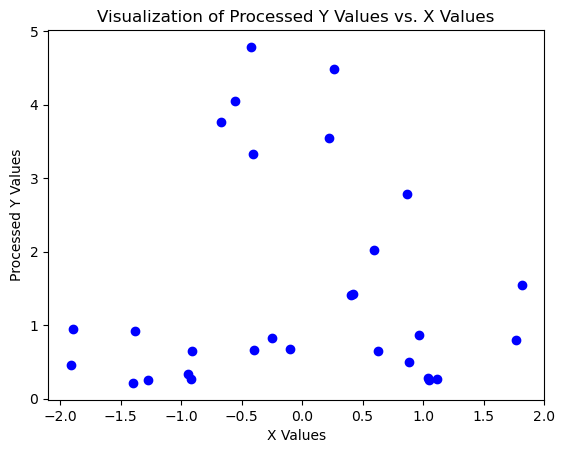

In [13]:
# Your solution to plot goes here
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, "bo")
plt.xlabel('X Values')
plt.ylabel('Processed Y Values')
plt.title('Visualization of Processed Y Values vs. X Values')
plt.show()


#### Step 4: Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`.

In [14]:
import numpy as np

def data_to_csv(x_values, y_values, filename):
    # Stack x_values and y_values horizontally to create a 2D array
    data = np.column_stack((x_values, y_values))
    
    # Save the array to a CSV file with the specified filename and delimiter
    np.savetxt(filename, data, delimiter=',')
    

data_to_csv(x_values, y_values, 'processed_data.csv')


In [15]:
### BEGIN HIDDEN TESTS
assert 2 == 1+1
### END HIDDEN TESTS